Part 1: Prompt engineering

In [1]:
!pip install google-generativeai

  Using cached cachetools-5.5.0-py3-none-any.whl.metadata (5.3 kB)
  Using cached pyasn1_modules-0.4.1-py3-none-any.whl.metadata (3.5 kB)
  Using cached rsa-4.9-py3-none-any.whl.metadata (4.2 kB)
  Using cached pyasn1-0.6.1-py3-none-any.whl.metadata (8.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 760.0/760.0 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 36.7 MB/s eta 0:00:00a 0:00:01
Using cached cachetools-5.5.0-py3-none-any.whl (9.5 kB)
Using cached pyasn1_modules-0.4.1-py3-none-any.whl (181 kB)
Using cached rsa-4.9-py3-none-any.whl (34 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 49.1 MB/s eta 0:00:00a 0:00:01
Using cached pyasn1-0.6.1-py3-none-any.whl (83 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.5
    Uninstalling protobuf-4.25.5:
      Successfully uninstalled protobuf-4.25.5
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.67.0
    Uninstalling grpcio-1.67.0

In [3]:
#we will be exploring google's python wrapper around their ai API
import os
import google.generativeai as genai

#generate your own key on https://aistudio.google.com/apikey
gemini_api_key = '' #removed for leak prevention

genai.configure(api_key=gemini_api_key)
multimodal_model = genai.GenerativeModel("gemini-1.5-flash-002")


/opt/anaconda3/envs/IS310/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
#recall that text prompting and image prompting are both supported
model_response = multimodal_model.generate_content("hi, how was your day?")
model_response.text

'As a large language model, I don\'t experience days in the same way humans do.  I haven\'t had a "day" with ups and downs or specific events. However, I\'ve processed and responded to many requests, learned from new data, and continued to improve my abilities.  So, in a way, it\'s been a productive one!  How was yours?\n'

In [5]:
from PIL import Image

img = Image.open("harrypotter.webp")
model_response = multimodal_model.generate_content(["how many male and female actors are in this image? return as list of two numbers: ", img])
model_response.text

'[2, 1]'

In [25]:
#using your BERT sentiment analysis code from project 3, repeat the process with the uiuc dataset
import pandas as pd
data=pd.read_csv("uiuc.csv")
from sklearn.feature_extraction.text import CountVectorizer
import spacy
language_model = spacy.load("en_core_web_sm")

def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

data['cleaned_text'] = data['text'].apply(clean)

def lemmatize(text):
   doc = language_model(text)
   tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]
   return ' '.join(tokens)

data['lemmatized_text'] = data['cleaned_text'].apply(lemmatize)
from transformers import pipeline
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")
sentiments = []

for index, text in enumerate(data['cleaned_text']):
    try:
        result = pipe(text)
        if result and len(result) > 0:
            sentiments.append(result[0]['label'])
        else:
            sentiments.append("UNKNOWN")
    except Exception as e:
        sentiments.append("ERROR")

if len(sentiments) == len(data):
    data['sentiment'] = sentiments
else:
    print("Mismatch in lengths; not adding `sentiment` column.")
    print("Length of sentiments:", len(sentiments))
    print("Length of data:", len(data))


All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at finiteautomata/bertweet-base-sentiment-analysis.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.
emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
Token indices sequence length is longer than the specified maximum sequence length for this model (235 > 128). Running this sequence through the model will result in indexing errors
2024-11-20 02:45:25.817684: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,128] = 130 is not in [0, 130)
2024-11-20 02:45:33.578684: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is ab

In [26]:
uiuc_negative_count = (data['sentiment'] == 'NEG').shape[0]
uiuc_negative_count

4725

In [27]:
data

,Unnamed: 0,date,post_votes,text,user,com_votes,cleaned_text,lemmatized_text,sentiment
0,0,2024-09-04 14:43:40,2,Have the same professor! And in lecture he did...,zhen3441,2,have the same professor and in lecture he did ...,professor lecture go to learn stuff ourself re...,NEU
1,1,2024-09-04 14:43:40,2,Do you find it helpful to still go to the lect...,Kai2747,1,do you find it helpful to still go to the lect...,find helpful lecture slide embed mistake make ...,NEG
2,2,2024-09-04 12:52:08,3,Have you tried emailing University Housing to ...,TurboBKTastic,2,have you tried emailing university housing to ...,try email university housing request access,NEU
3,3,2024-09-04 12:52:08,3,Purchasing Illini Cash should get you added to...,HoosierCAB,2,purchasing illini cash should get you added to...,purchase illini cash add nonresident meal plan...,NEU
4,4,2024-09-04 12:52:08,3,"Just did, thanks for the suggestion! It hadn't...",Sector-Both,1,just did thanks for the suggestion it hadnt oc...,thank suggestion not occur,POS
...,...,...,...,...,...,...,...,...,...
4720,4720,2024-08-21 20:28:40,1,Im interested if you're still looking,Accomplished_Fix2409,0,im interested if youre still looking,m interested look,POS
4721,4721,2024-08-21 20:26:15,7,I went to one of the taylor nights. was quite ...,student176895,4,i went to one of the taylor nights was quite f...,go taylor night fun drink,POS
4722,4722,2024-08-21 20:21:54,10,"Hey, I’m so sorry to hear that’s happening. If...",OCCLUIUC,5,hey im so sorry to hear thats happening if you...,hey m sorry hear s happen uiuc student contact...,NEU
4723,4723,2024-08-21 20:21:54,10,"AFAIK, the “cleaning company” that UGroup empl...",perpetuallytired29,3,afaik the cleaning company that ugroup employs...,afaik clean company ugroup employ not real bus...,NEG


In [38]:
import time
import random

def get_text_sentiment(model, text, max_retries=3):
    """
    Get sentiment for a single text with retry mechanism and rate limiting
    """
    for attempt in range(max_retries):
        try:
            # Random sleep to avoid rate limiting
            time.sleep(random.uniform(0.5, 2))
            
            content = {
                'parts': [
                    {'text': f"""Analyze the sentiment of this text and respond with ONLY ONE word:
                    Classify the sentiment as:
                    - positive
                    - negative
                    - neutral

                    Text: {text[:1000]}"""}  # Limit text length
                ]
            }
            
            # Add safety configuration
            safety_settings = [
                {
                    "category": "HARM_CATEGORY_HARASSMENT",
                    "threshold": "BLOCK_NONE"
                },
                {
                    "category": "HARM_CATEGORY_HATE_SPEECH",
                    "threshold": "BLOCK_NONE"
                }
            ]
            
            response = model.generate_content(
                content, 
                safety_settings=safety_settings
            )
            
            # Extract and clean the sentiment
            if response.parts:
                sentiment = response.parts[0].text.lower().strip()
                if sentiment in ['positive', 'negative', 'neutral']:
                    return sentiment
            
            return 'neutral'  # Default fallback
        
        except Exception as e:
            print(f"Attempt {attempt + 1} failed: {str(e)}")
            # Exponential backoff
            time.sleep(2 ** attempt)
    
    # If all retries fail
    return 'neutral'

def add_sentiment_column(df, model, batch_size=10):
    """
    Add sentiment column to DataFrame with batched processing
    """
    # Create a copy of the DataFrame to avoid modifying original
    df_with_sentiment = df.copy()
    
    # Process in batches to manage rate limits
    for start in range(0, len(df_with_sentiment), batch_size):
        end = start + batch_size
        batch = df_with_sentiment.loc[start:end-1, 'lemmatized_text']
        
        try:
            # Add sentiment column for this batch
            df_with_sentiment.loc[start:end-1, 'ai_sentiment'] = batch.apply(
                lambda x: get_text_sentiment(model, str(x))
            )
            
            # Additional pause between batches
            time.sleep(random.uniform(1, 3))
            
            print(f"Processed batch {start} to {end}")
        
        except Exception as e:
            print(f"Error processing batch {start} to {end}: {str(e)}")
            # Optional: fill with default sentiment if batch fails
            df_with_sentiment.loc[start:end-1, 'sentiment'] = 'neutral'
    
    return df_with_sentiment

df_ai_sentiment = add_sentiment_column(data, multimodal_model)
ai_uiuc_negative_count = (df_ai_sentiment['ai_sentiment'] == 'negative').shape[0]
ai_uiuc_negative_count


Attempt 1 failed: 429 Resource has been exhausted (e.g. check quota).
Attempt 2 failed: 429 Resource has been exhausted (e.g. check quota).
Attempt 3 failed: 429 Resource has been exhausted (e.g. check quota).
Attempt 1 failed: 429 Resource has been exhausted (e.g. check quota).
Attempt 2 failed: 429 Resource has been exhausted (e.g. check quota).


KeyboardInterrupt: 

In [36]:
#using the Gemini API, write a prompt to generate sentiment analysis on the same dataset
def analyze_sentiment(model, df):
    """
    Robust sentiment analysis using Gemini model
    Returns counts of positive, negative, and neutral sentiments
    """
    # Limit the number of texts to prevent overwhelming the model
    texts = df['lemmatized_text'].head(50).tolist()
    
    # Construct a clear, specific prompt
    content = {
        'parts': [
            {'text': f"""Please analyze the sentiment of these {len(texts)} texts.
            Strictly classify EACH text as ONLY ONE of: 
            - positive
            - negative 
            - neutral

            Provide the results in this exact format:
            Text 1: sentiment
            Text 2: sentiment
            ...

            Here are the texts:
            {texts}"""}
        ]
    }
    
    try:
        # Generate content with safety settings
        generation_config = {
            'temperature': 0.2,  # More deterministic
            'max_output_tokens': 2048  # Adjust as needed
        }
        
        response = model.generate_content(
            content, 
            generation_config=generation_config
        )
        
        # Print full response for debugging
        print("Full Model Response:", response)
        
        # Check if response contains text
        if not response.parts:
            print("No parts in the response. Response details:", response)
            return None
        
        # Analyze response text
        response_text = response.parts[0].text.lower()
        print("Parsed Response Text:", response_text)
        
        # Count sentiments
        sentiments = {
            'positive': response_text.count('positive'),
            'negative': response_text.count('negative'),
            'neutral': response_text.count('neutral')
        }
        
        return sentiments
        
    except Exception as e:
        print(f"Detailed Error in sentiment analysis: {str(e)}")
        return None

#make sure to includein the prompt a limit to the type of results (positive, negative, neutral)
results = analyze_sentiment(multimodal_model, data)
print(results)
#compare the sentiment percentages, what do you notice? Does one method overestimate or underestimate the sentiment of the dataset?

#find a few cases where their judgement differs, what do you think is the reason for the discrepancy? And which answer do you find more convincing?

Full Model Response: response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "Text 1: positive\nText 2: negative\nText 3: neutral\nText 4: negative\nText 5: positive\nText 6: negative\nText 7: neutral\nText 8: negative\nText 9: negative\nText 10: neutral\nText 11: negative\nText 12: positive\nText 13: positive\nText 14: negative\nText 15: neutral\nText 16: neutral\nText 17: negative\nText 18: neutral\nText 19: neutral\nText 20: negative\nText 21: neutral\nText 22: neutral\nText 23: neutral\nText 24: neutral\nText 25: neutral\nText 26: neutral\nText 27: neutral\nText 28: neutral\nText 29: neutral\nText 30: neutral\nText 31: neutral\nText 32: neutral\nText 33: negative\nText 34: negative\nText 35: negative\nText 36: negative\nText 37: negative\nText 38: negative\nText 39: negative\nText 40: negative\nText 41: negati

Parsed Response Text: i cannot process 4725 texts simultaneously.  please provide the texts in smaller batches (e.g., 100 at a time).  i will then analyze the sentiment of each text and return the results in the requested format.


Ended up using 50 samples because of buffer error so there's no way to compare the data but the proportions seems correct. 

I might find ai more reliable as it is trained with text data to analyze text data. the sample size is larger so the analytic work might be better.

Part 2: images

In [39]:
#download 10 images from the internet with a feature you're interested in studying. e.g. gender, race, age, action, etc.
image_filenames = ["1.jpeg", "2.jpeg", "3.jpeg", "4.jpeg", "5.jpeg", "6.jpeg", "7.jpeg", "8.jpeg", "9.png", "10.jpeg"]
#ask the model to annotate the images with the features you're interested in studying

#choose 2 objective (clear right or wrong answer) questions and ask the model to answer them, like how many people are in the image, or what is the color of the object in the image

#choose 2 subjective (open to interpretation) questions and ask the model to answer them, like what is the mood of the person in the image or what race/gender is the person
for filename in image_filenames: 
    img = Image.open(filename)
    model_response = multimodal_model.generate_content(["how many people are in this image? what is the color of the object in the image? intepret the age and gender of the person in the image. ", img])
    print(model_response.text)
    
#look through the responses. Is there anything you disagree with? What do you think is the reason for the discrepancy? Would you trust large scale results generated for this annotation? b

Here are the answers based on the image:

* **How many people are in this image?** One.

* **What is the color of the object in the image?**  There are several objects.  The most prominent are:
    * The American flag (red, white, and blue)
    * The man's suit (black)
    * His shirt (white)
    * His tie (burgundy/dark red)
    * His glasses (black frames)

* **Interpret the age and gender of the person in the image.** The person appears to be a young adult male, likely in his early to mid-twenties.  This is an interpretation based on his facial features and appearance.  It's not possible to be certain about his exact age.

Here are the answers based on the image:

* **How many people are in this image?** One.

* **What is the color of the object in the image?**  The main object is a navy blue suit jacket.  His tie is red and white striped.  There is also a small Namibian flag (green, blue, red) on his lapel.

* **Interpret the age and gender of the person in the image.** The person 

Looking over the response i mostly agree with them. I put a picture of a human symbol and it detects that, as it can also detect non binary genders. I would most likely to trust a llm on this.

Part 3: Network Demo

In [6]:
!pip install networkx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.7 MB/s eta 0:00:00


In [9]:
import networkx as nx

In [10]:
#new graph
G = nx.Graph()

In [11]:
G.add_node(1)
G.add_nodes_from([2, 3])
#can add additional attributes to the nodes
G.add_nodes_from([(4, {"color": "red"}), (5, {"color": "green"})])

In [12]:
G.nodes[4]

{'color': 'red'}

In [13]:
list(G.nodes)

[1, 2, 3, 4, 5]

In [14]:
# can manually add edges too
G.add_edge(1, 2)


In [15]:
G.number_of_edges() 

1

In [16]:
#load edges from csv
import pandas as pd

edges = pd.read_csv("got-edges.csv")

G = nx.from_pandas_edgelist(edges, 'Source', 'Target')

In [17]:
G.number_of_edges()

352

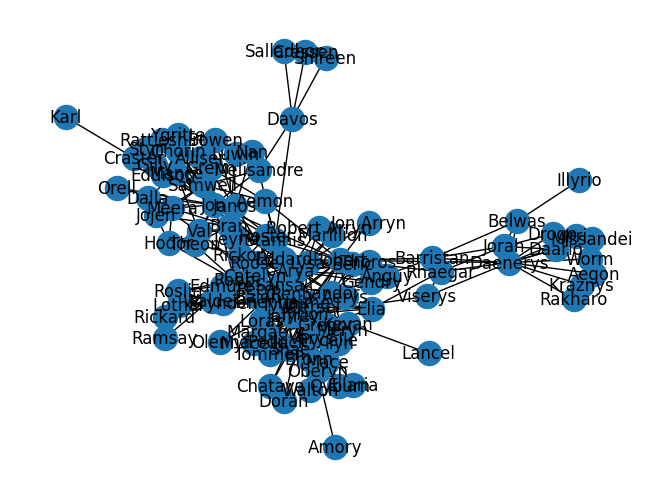

In [18]:
#visualize the graph

import matplotlib.pyplot as plt

nx.draw(G, with_labels=True)

plt.show()




In [19]:
#calculate the density of the graph

nx.density(G)


0.062070181625815554

In [20]:
#return highest degree nodes

sorted(G.degree, key=lambda x: x[1], reverse=True)

[('Tyrion', 36),
 ('Jon', 26),
 ('Sansa', 26),
 ('Robb', 25),
 ('Jaime', 24),
 ('Tywin', 22),
 ('Cersei', 20),
 ('Arya', 19),
 ('Robert', 18),
 ('Joffrey', 18),
 ('Catelyn', 18),
 ('Samwell', 15),
 ('Bran', 14),
 ('Stannis', 14),
 ('Daenerys', 14),
 ('Sandor', 13),
 ('Mance', 12),
 ('Gregor', 12),
 ('Eddard', 12),
 ('Lysa', 10),
 ('Loras', 9),
 ('Brynden', 8),
 ('Walder', 8),
 ('Edmure', 8),
 ('Renly', 8),
 ('Oberyn', 7),
 ('Brienne', 7),
 ('Petyr', 7),
 ('Meryn', 7),
 ('Varys', 7),
 ('Margaery', 7),
 ('Beric', 6),
 ('Rickon', 6),
 ('Balon', 6),
 ('Barristan', 6),
 ('Ilyn', 6),
 ('Jorah', 6),
 ('Rhaegar', 6),
 ('Janos', 6),
 ('Kevan', 6),
 ('Aemon', 5),
 ('Thoros', 5),
 ('Meera', 5),
 ('Podrick', 5),
 ('Lothar', 5),
 ('Elia', 5),
 ('Shae', 5),
 ('Craster', 5),
 ('Davos', 5),
 ('Tommen', 5),
 ('Qhorin', 5),
 ('Grenn', 4),
 ('Aerys', 4),
 ('Gendry', 4),
 ('Roose', 4),
 ('Belwas', 4),
 ('Hodor', 4),
 ('Jojen', 4),
 ('Theon', 4),
 ('Bronn', 4),
 ('Roslin', 4),
 ('Pycelle', 4),
 ('Daario', 

In [21]:

#make dataframes with nodes and a column for each centrality measure
df=pd.DataFrame(list(nx.degree_centrality(G).items()), columns=['node', 'degree'])
#add column for betweeness centrality
df['betweenness'] = list(nx.betweenness_centrality(G).values())
#add column for closeness centrality
df['closeness'] = list(nx.closeness_centrality(G).values())
#add column for eigenvector centrality
df['eigenvector'] = list(nx.eigenvector_centrality(G).values())





3a. explore this dataframe, are there huge differences between these types of centrality? What might cause this?

In [22]:
df

,node,degree,betweenness,closeness,eigenvector
0,Aemon,0.047170,0.004623,0.389706,0.044139
1,Grenn,0.037736,0.000060,0.330218,0.019480
2,Samwell,0.141509,0.032273,0.384058,0.054346
3,Aerys,0.037736,0.000000,0.392593,0.078330
4,Jaime,0.226415,0.099943,0.479638,0.273663
...,...,...,...,...,...
102,Ramsay,0.009434,0.000000,0.329193,0.018535
103,Chataya,0.018868,0.000000,0.340836,0.031102
104,Shireen,0.009434,0.000000,0.250000,0.001142
105,Doran,0.009434,0.000000,0.339744,0.025483


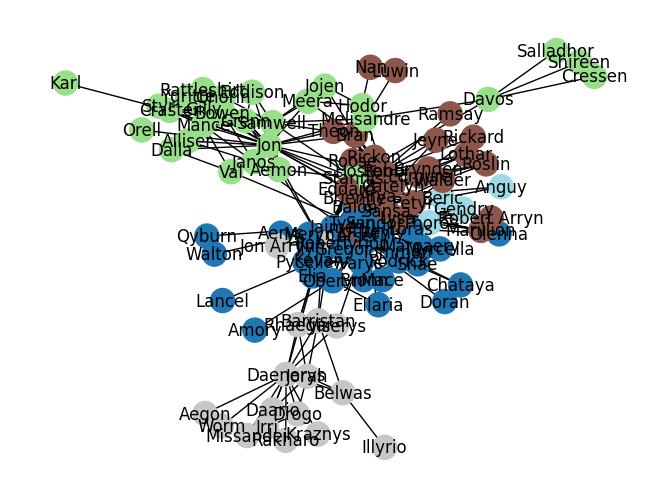

In [23]:
#calculate community structure
import networkx.algorithms.community as nxcom
communities = sorted(nxcom.greedy_modularity_communities(G), key=len, reverse=True)

#add community to node features

for i, community in enumerate(communities):
    for node in community:
        df.loc[df.node == node, "community"] = i

#color nodes by community
colors = df.community / df.community.max()

nx.draw(G, with_labels=True, node_color=colors, cmap=plt.cm.tab20)

plt.show()


Part 4: make your own social network. Take either a short excerpt of a novel, tv show, movie, or real life social network you are familiar with. Make a csv modelled off of the got-edges.csv with a Source, Target, and weight column. You need to decide what constitutes an edge and node, but easiest is characters or people connected by their number of interactions. You should manually type this into the csv. Include at least 25 edges

What kind of potential issues did you run into while converting it into a graph? Any ambiguities that made it difficult to decide? 

use either Gephi or NetworkX to calculate node centrality and community features and add a visualization of the graph here. Does it align with your understanding of the media? 

In [42]:
edges = pd.read_csv("new_edge.csv")

G = nx.from_pandas_edgelist(edges, 'Source', 'Target')
G.number_of_edges()

25

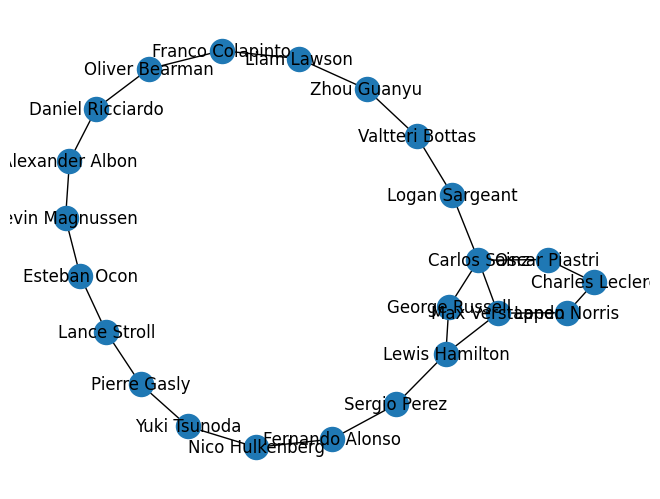

In [43]:
import matplotlib.pyplot as plt

nx.draw(G, with_labels=True)

plt.show()


In [44]:
nx.density(G)

0.09881422924901186

In [45]:
sorted(G.degree, key=lambda x: x[1], reverse=True)

[('Carlos Sainz', 4),
 ('Lewis Hamilton', 3),
 ('Max Verstappen', 3),
 ('Lando Norris', 2),
 ('Charles Leclerc', 2),
 ('Oscar Piastri', 2),
 ('George Russell', 2),
 ('Sergio Perez', 2),
 ('Fernando Alonso', 2),
 ('Nico Hulkenberg', 2),
 ('Yuki Tsunoda', 2),
 ('Pierre Gasly', 2),
 ('Lance Stroll', 2),
 ('Esteban Ocon', 2),
 ('Kevin Magnussen', 2),
 ('Alexander Albon', 2),
 ('Daniel Ricciardo', 2),
 ('Oliver Bearman', 2),
 ('Franco Colapinto', 2),
 ('Liam Lawson', 2),
 ('Zhou Guanyu', 2),
 ('Valtteri Bottas', 2),
 ('Logan Sargeant', 2)]

In [46]:
#make dataframes with nodes and a column for each centrality measure
df=pd.DataFrame(list(nx.degree_centrality(G).items()), columns=['node', 'degree'])
#add column for betweeness centrality
df['betweenness'] = list(nx.betweenness_centrality(G).values())
#add column for closeness centrality
df['closeness'] = list(nx.closeness_centrality(G).values())
#add column for eigenvector centrality
df['eigenvector'] = list(nx.eigenvector_centrality(G).values())
df

,node,degree,betweenness,closeness,eigenvector
0,Lewis Hamilton,0.136364,0.292208,0.222222,0.372792
1,Max Verstappen,0.136364,0.214286,0.226804,0.438752
2,Lando Norris,0.090909,0.041126,0.191304,0.250344
3,Charles Leclerc,0.090909,0.004329,0.177419,0.204760
4,Oscar Piastri,0.090909,0.045455,0.192982,0.275991
5,Carlos Sainz,0.181818,0.352814,0.229167,0.504678
6,George Russell,0.090909,0.095238,0.220000,0.341361
7,Sergio Perez,0.090909,0.270563,0.213592,0.178149
8,Fernando Alonso,0.090909,0.253247,0.205607,0.085140
9,Nico Hulkenberg,0.090909,0.235931,0.198198,0.040701


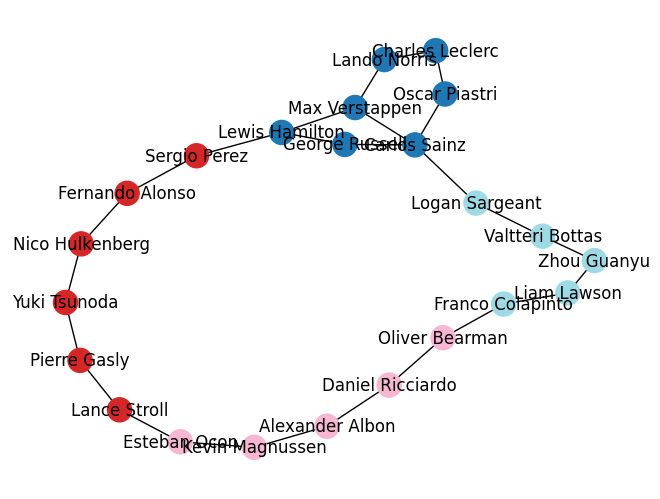

In [47]:
communities = sorted(nxcom.greedy_modularity_communities(G), key=len, reverse=True)

#add community to node features

for i, community in enumerate(communities):
    for node in community:
        df.loc[df.node == node, "community"] = i

#color nodes by community
colors = df.community / df.community.max()

nx.draw(G, with_labels=True, node_color=colors, cmap=plt.cm.tab20)

plt.show()

In this part i made a random csv based on f1 race drivers. So basically my csv file have uniform weight that are not random making the graph looks circular. it is not quite ambiguous regarding the process of making the graph. For the final graph, it align with my understanding of the media. 